<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/nyandwi/machine_learning_complete/blob/main/6_classical_machine_learning_with_scikit-learn/4_support_vector_machines_for_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

*This notebook was created by [Jean de Dieu Nyandwi](https://twitter.com/jeande_d) for the love of machine learning community. For any feedback, errors or suggestion, he can be reached on email (johnjw7084 at gmail dot com), [Twitter](https://twitter.com/jeande_d), or [LinkedIn](https://linkedin.com/in/nyandwi).*

<a name='0'></a>
# Support Vector Machines (SVM) - Classification

Support Vector Machines are the type of supervised learning algorithms used for regression, classification and detecting outliers. SVMs are remarkably one of the powerful models in classical machine learning suited for handling complex and high dimensional datasets. 

With SVM supporting different kernels (linear, polynomial, Radial Basis Function(rbf), and sigmoid), SVM can tackle different kinds of datasets, both linear and non linear. 

While the maths behind the SVMs are beyond the scope of this notebook, here is the idea behind SVMs:

*The way SVM works can be compared to a street with a boundary line. During SVM training, SMV draws the large margin or decision boundary between classes based on the importance of each training data point. The training data points that are inside the decision boundary are called support vectors and hence the name.*

![SVM](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Kernel_Machine.svg/1200px-Kernel_Machine.svg.png)   
    
Image source: Wikimedia

We are going to use Iris flower dataset.The dataset contain 3 species which are: `Iris Setosa`, `Iris Virginica`, `Iris Versicolor`. These species are what we can refer to categories/classes. The features are sepal length, sepal width, petal length, petal width. All features were measured in centimeters(cm). 


There are 50 samples for each specy, so we have 150 samples for all species. Below are the pictures of these 3 species. 

In [81]:
from IPython.display import Image

url_setosa = "../../assets/data/Kosaciec_szczecinkowaty_Iris_setosa.jpg"
url_virginica =  "../../assets/data/Iris_virginica.jpg"
url_versicolor =  "../../assets/data/Iris_versicolor_3.jpg"

urls = [url_setosa, url_virginica,url_versicolor]

def display_image(url):
    
    image = Image(url, width=250, height=200)
    
    return image

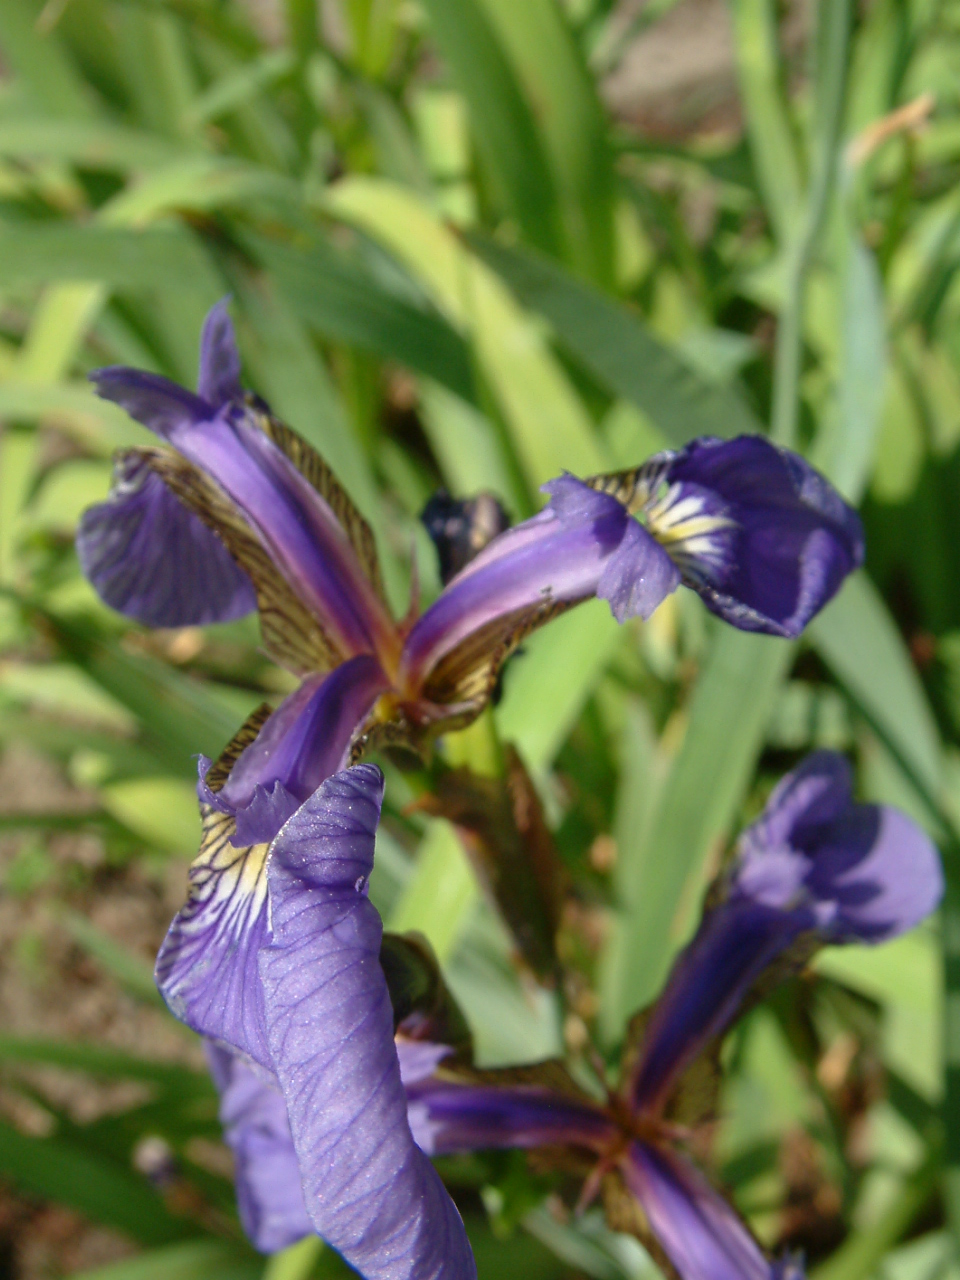

In [82]:
# Displaying Iris Setosa
display_image(urls[0])

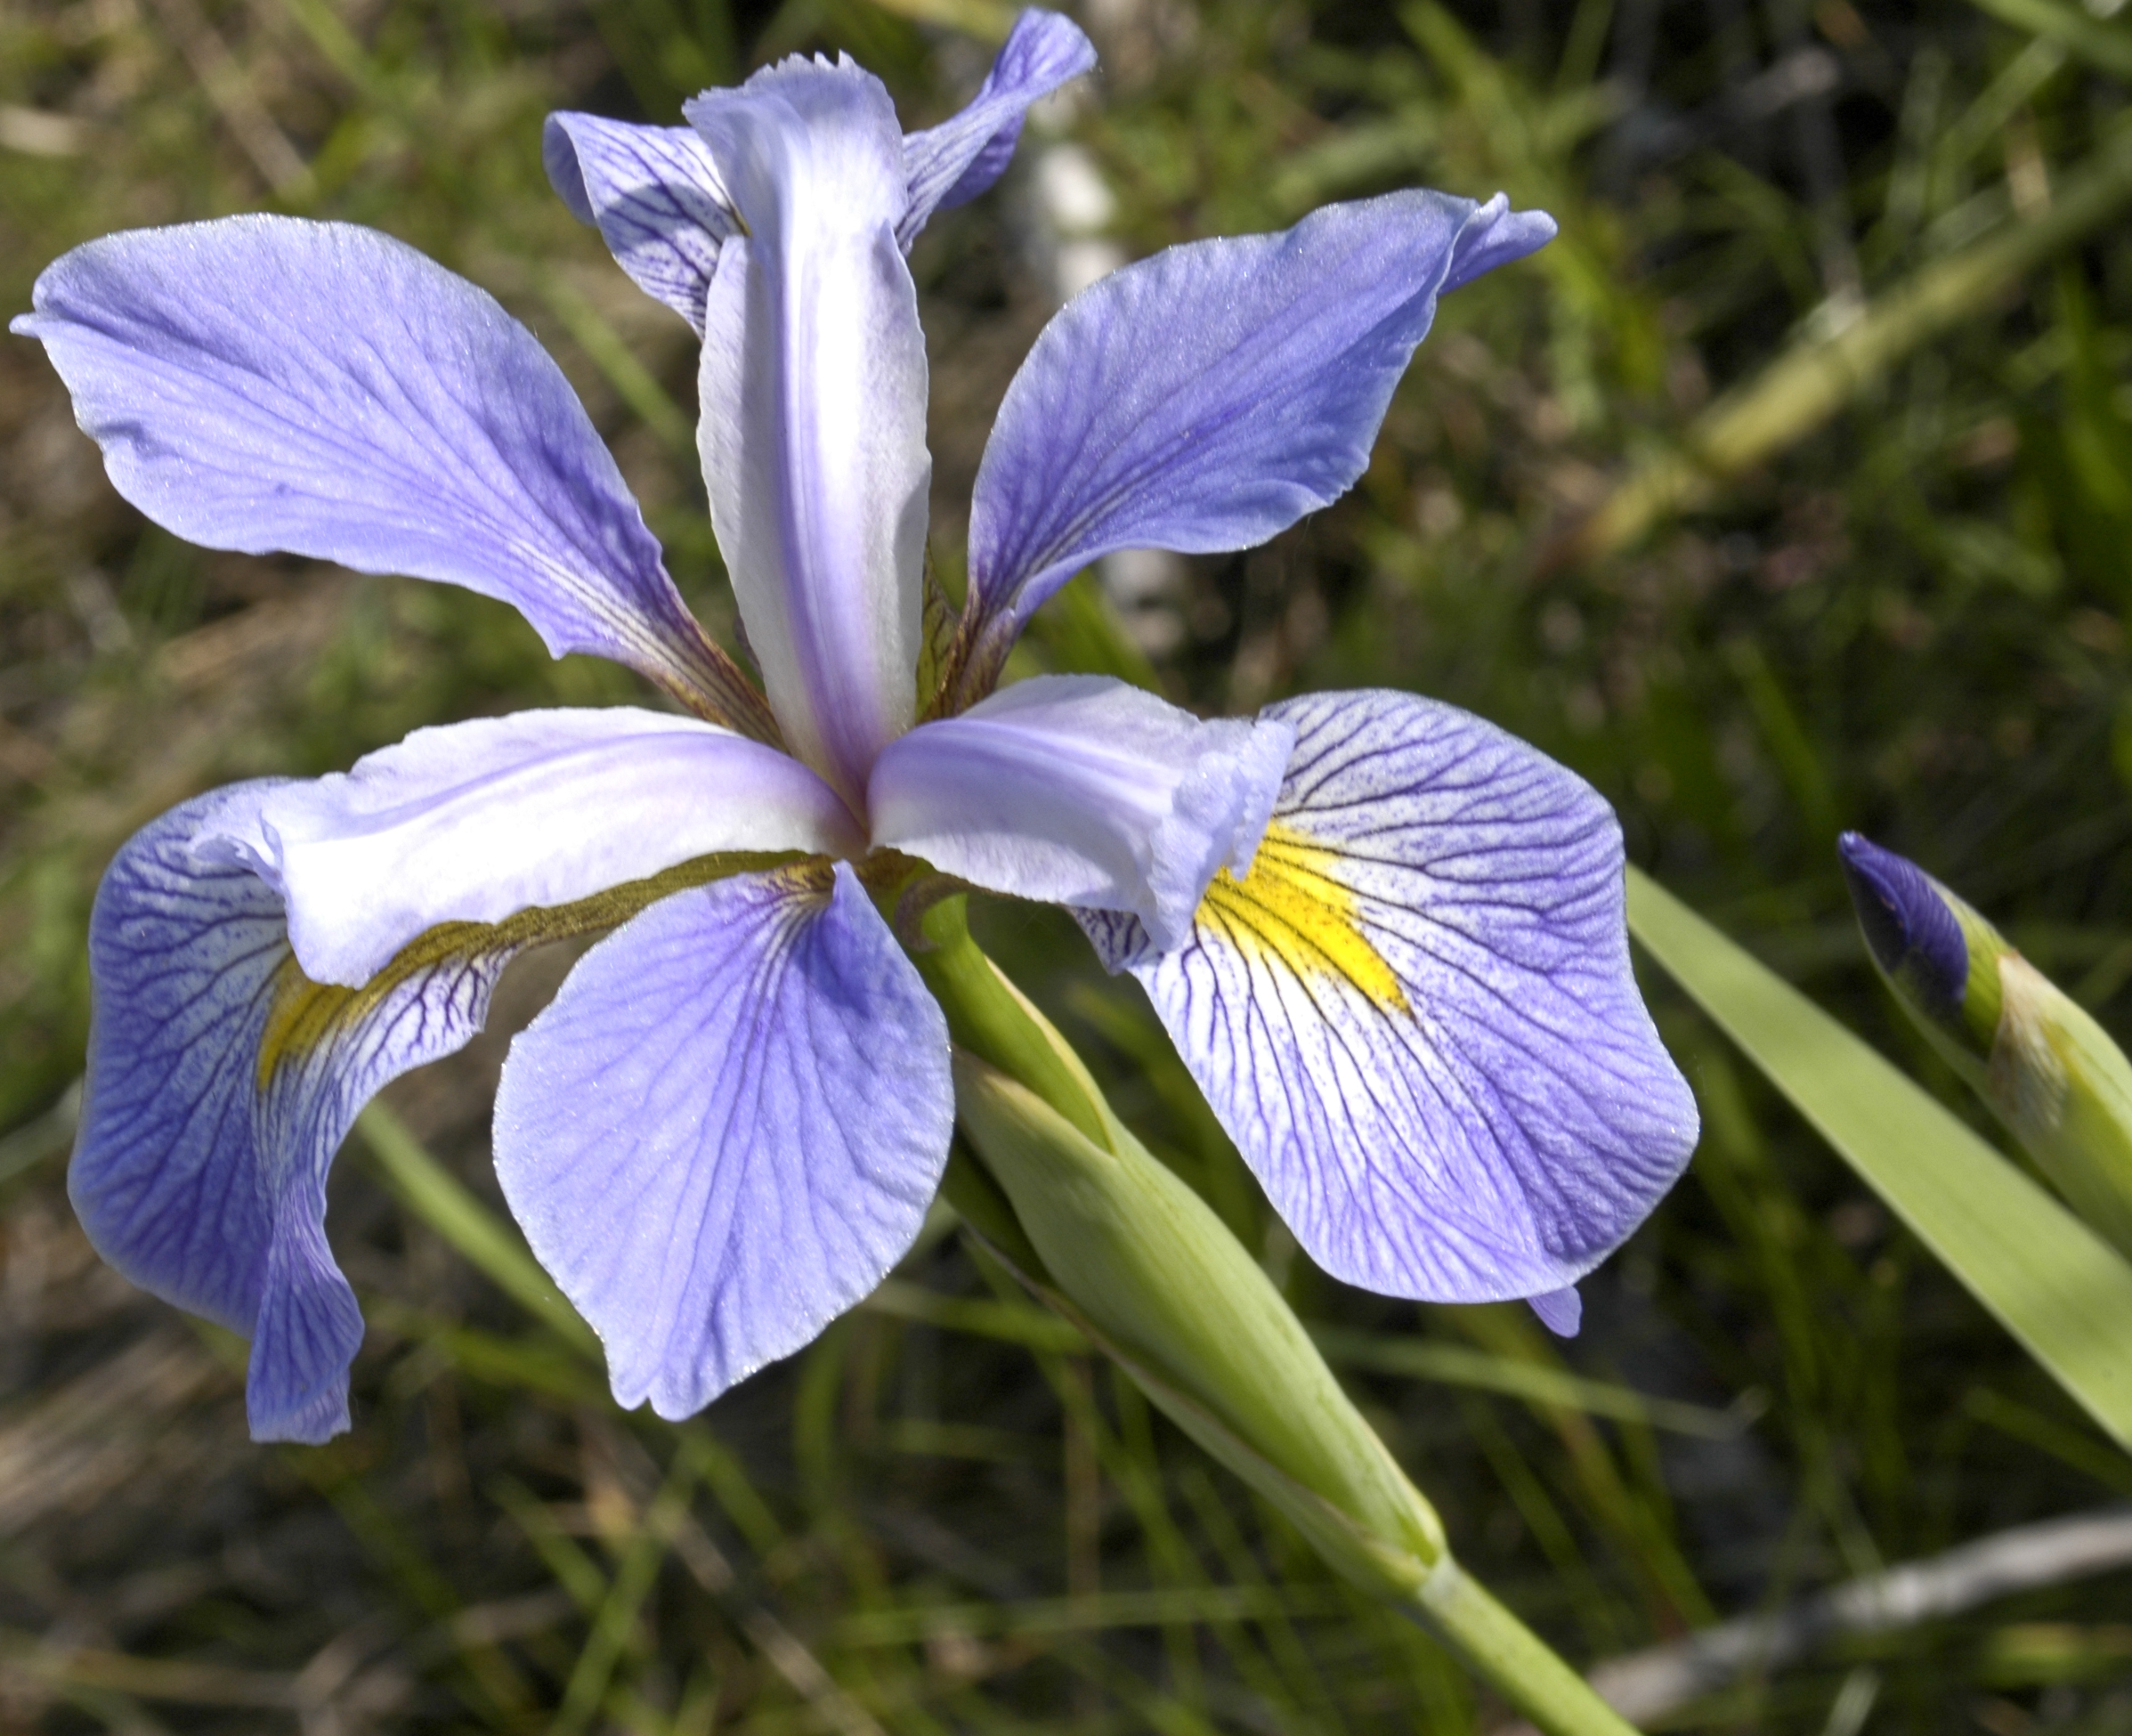

In [83]:
# Displaying Iris Virginica
display_image(urls[1])

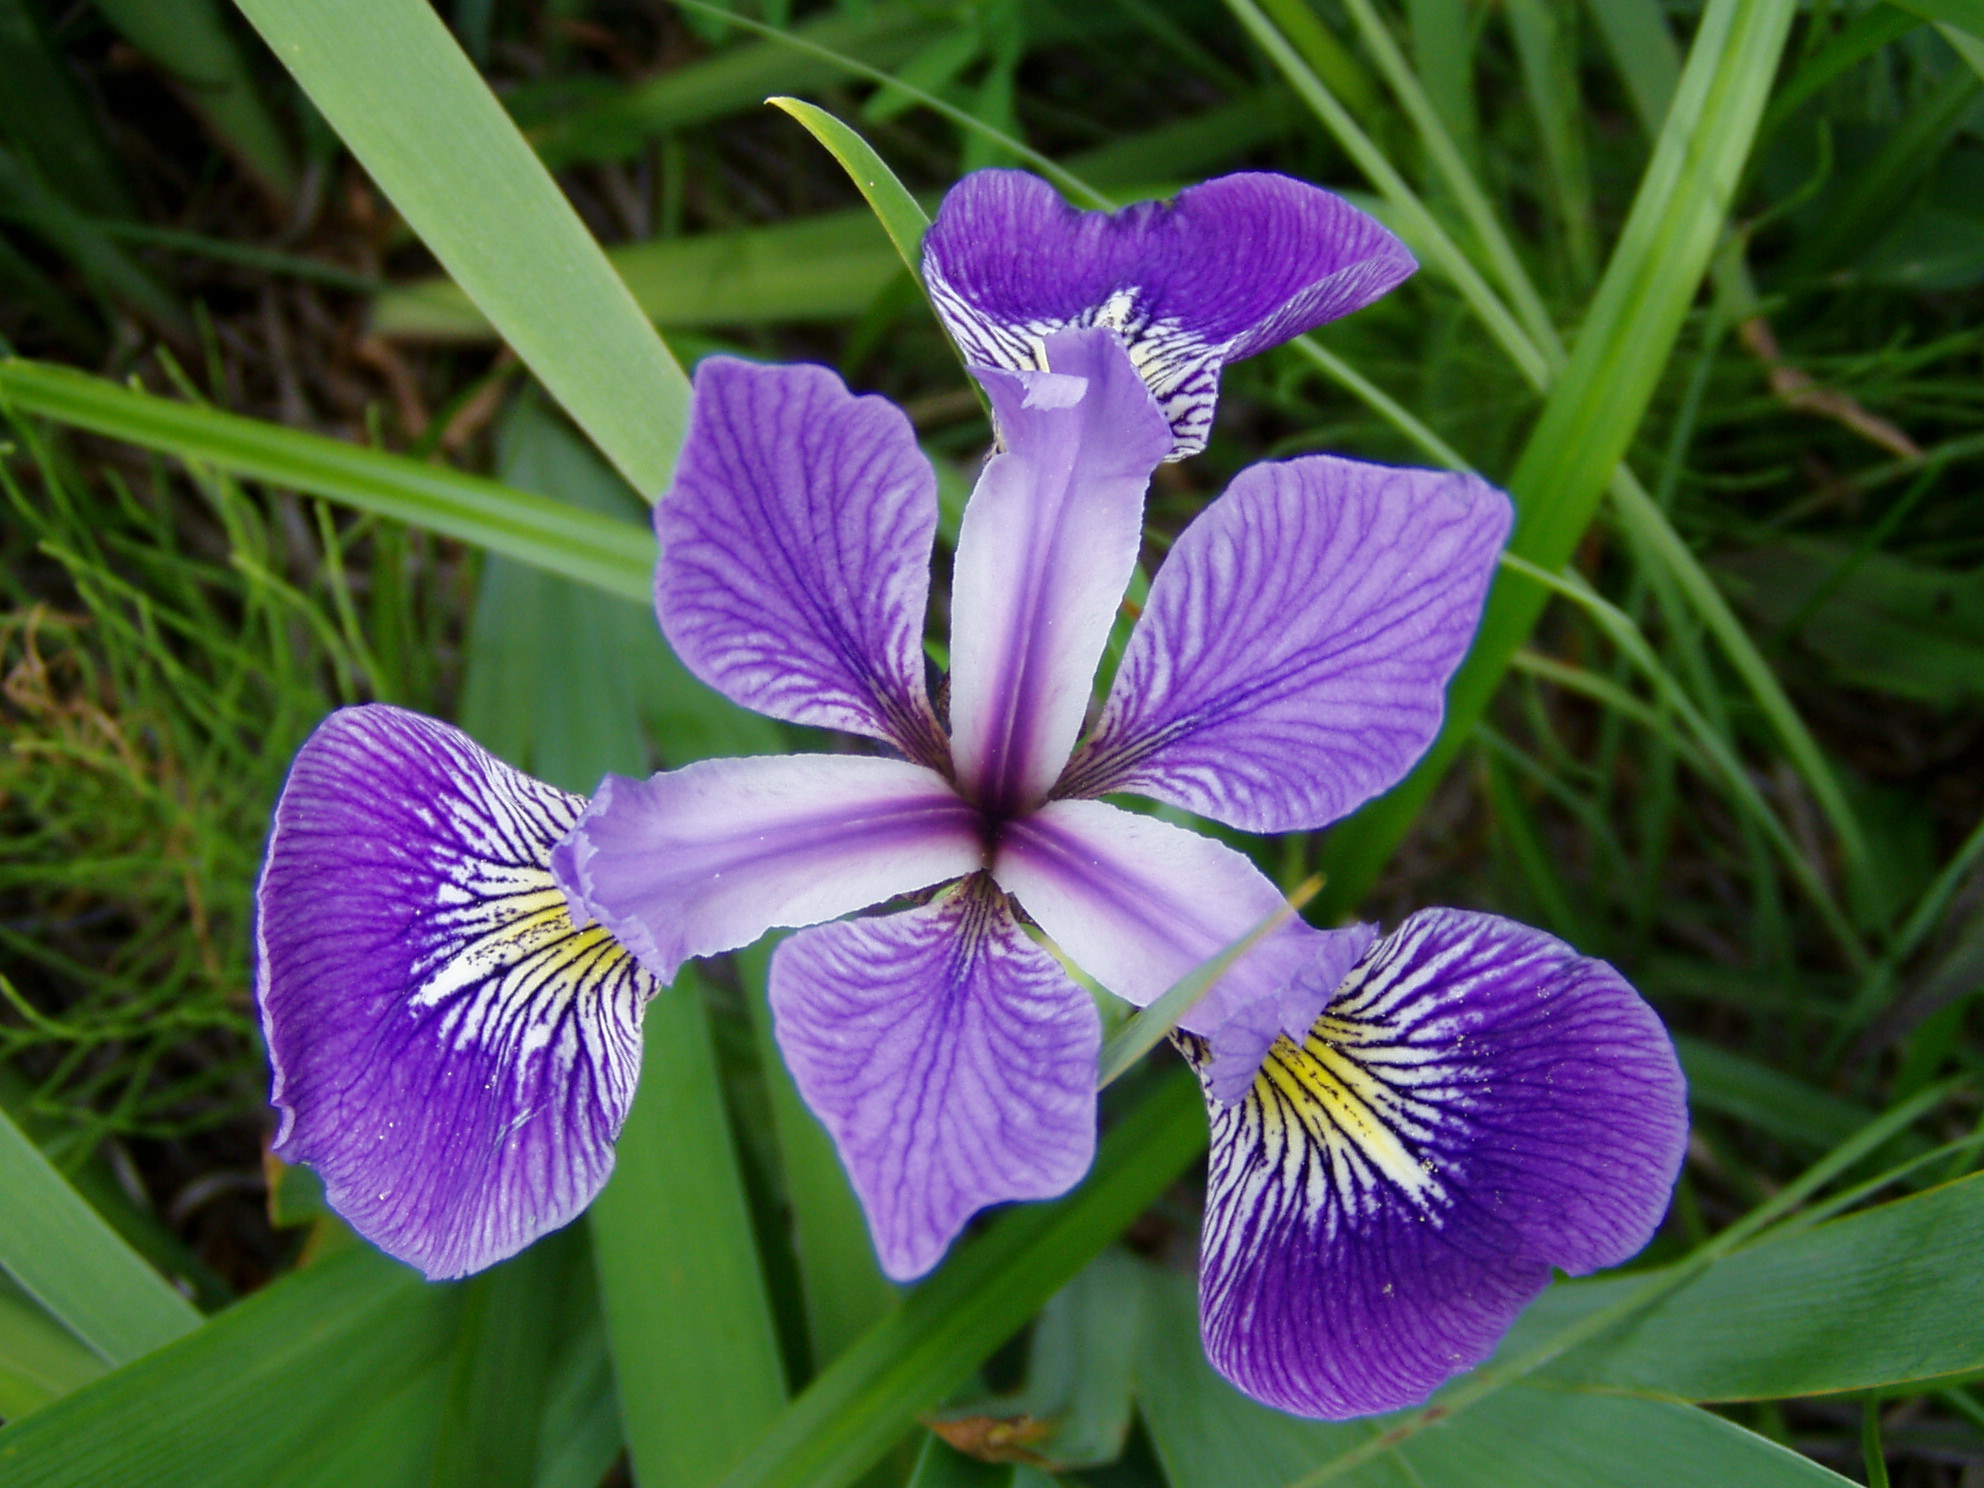

In [84]:
# Displaying Iris Versicolor
display_image(urls[2])

### Contents

* [1 - Imports](#1)
* [2 - Loading the data](#2)
* [3 - Exploratory Analysis](#3)
* [4 - Preprocessing the data](#4)
* [5 - Training Support Vector Classifier](#5)
* [6 - Evaluating Support Vector Classifier](#6)
* [7 - Improving Support Vector Classifier](#7)

<a name='1'></a>
## 1 - Imports

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

<a name='2'></a>

## 2 - Loading the data

We will get Iris data from Sklearn datasets. Setting `as_frame` parameter to `True` will return data as a Pandas Dataframe.

In [86]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True, as_frame=True)

In [87]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [88]:
X.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [89]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

## 3 - Exploratory Analysis

Before exploring some insight in data, let's split it into test and train set.


In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=20)

print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(X_train), len(X_test)))

The size of training data is: 120 
The size of testing data is: 30


In [91]:
# Three species

y_train.value_counts()

0    42
1    39
2    39
Name: target, dtype: int64

Plotting the histograms of all 4 features

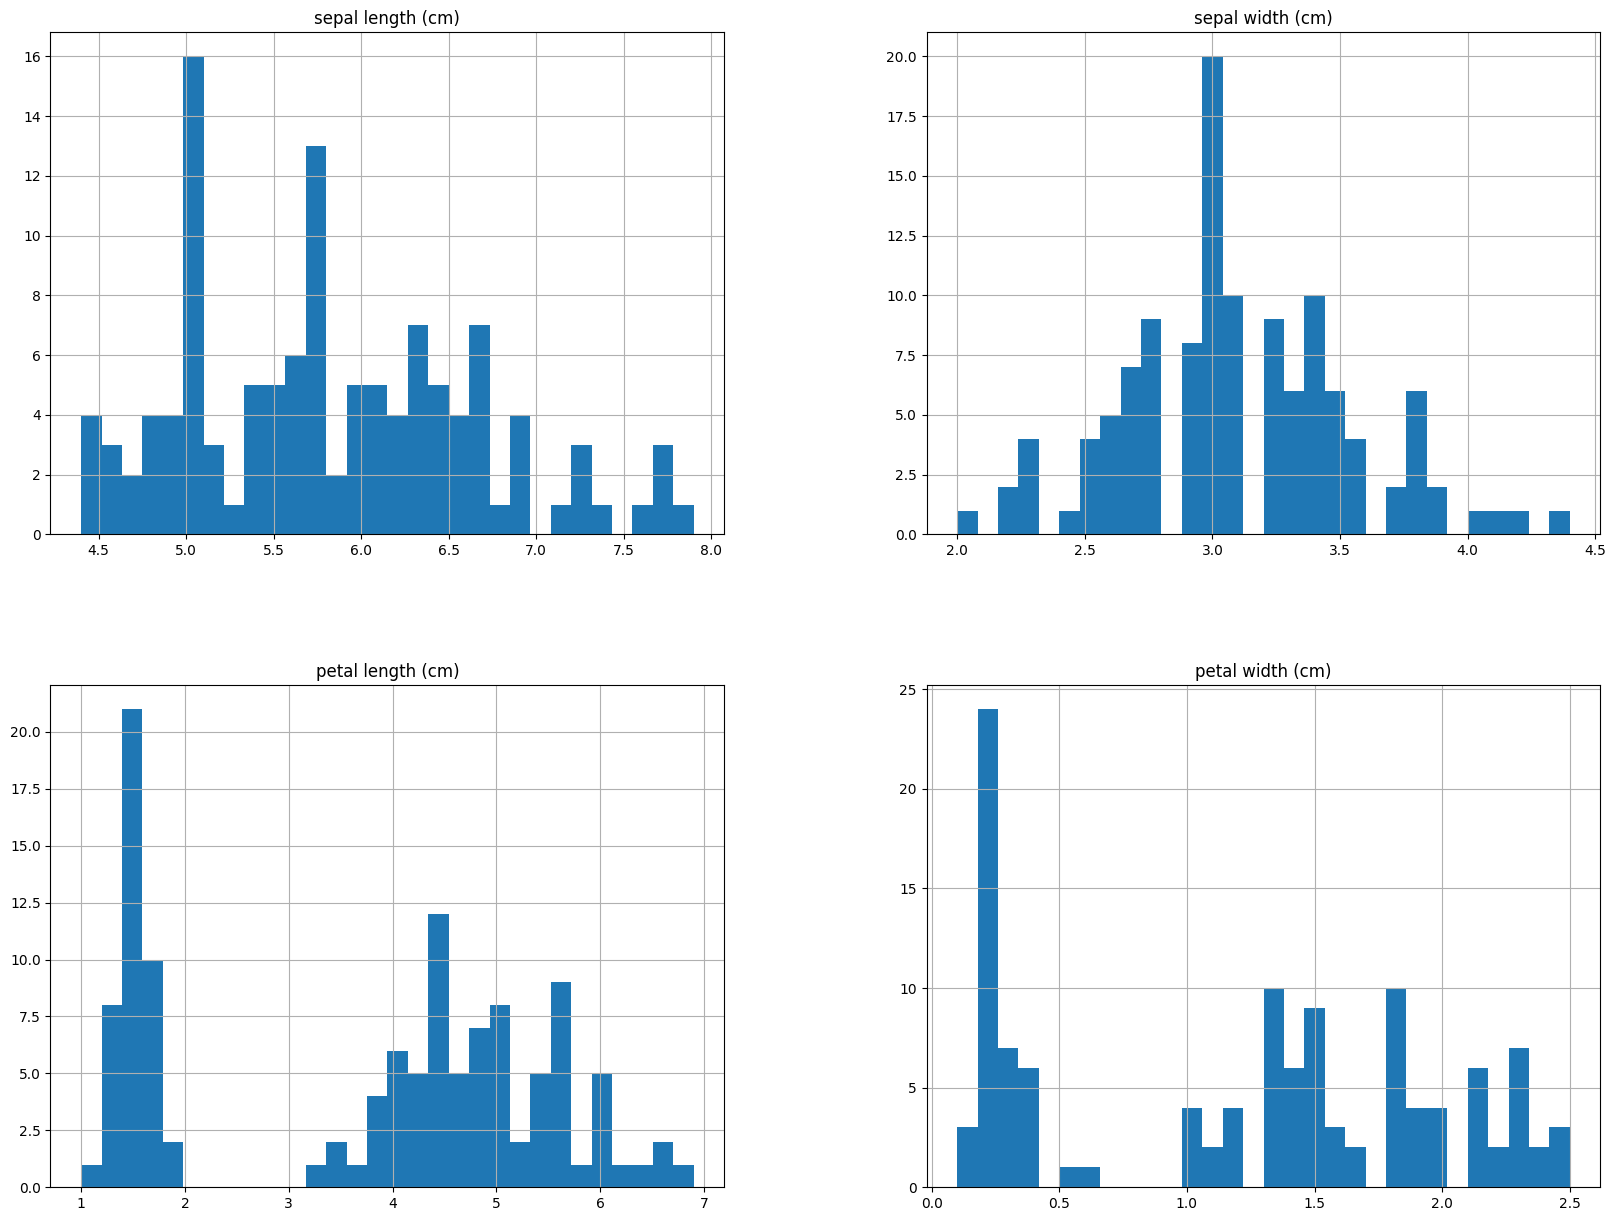

In [92]:
X_train.hist(bins=30, figsize=(20,15))
plt.show()

Plotting the scatter plots of the features

<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

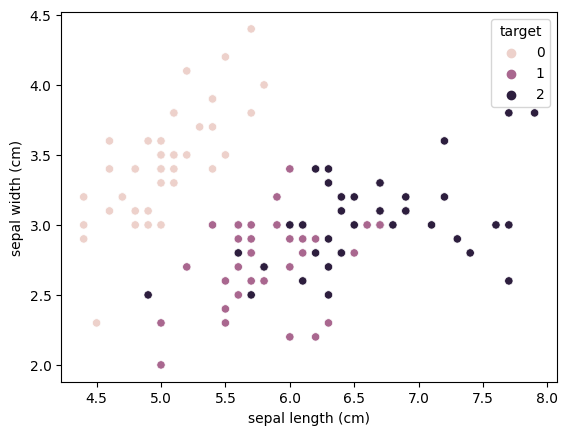

In [93]:
sns.scatterplot(data=X_train, x='sepal length (cm)', y='sepal width (cm)', hue=y_train)

<AxesSubplot: xlabel='petal length (cm)', ylabel='petal width (cm)'>

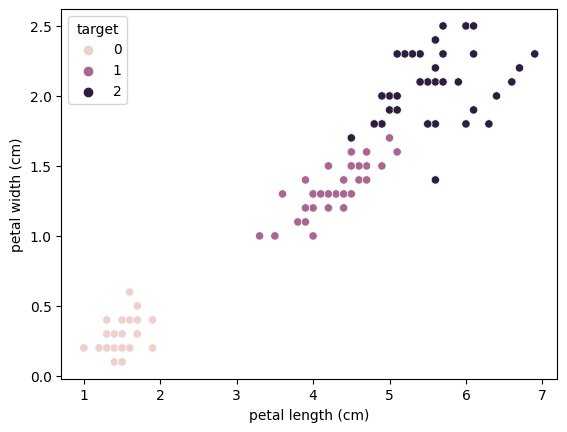

In [94]:
sns.scatterplot(data=X_train, x='petal length (cm)', y='petal width (cm)', hue=y_train)

<a name='4'></a>

## 4 - Data Preprocessing 

The features already have small values but let's scale them to be between 0 and 1. SVM work well with scaled values. I will set up a pipeline to handle that. 

In [95]:
X_train.max()

sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

scale_pipe = Pipeline([
    ('scaler', MinMaxScaler())
])

X_train_scaled = scale_pipe.fit_transform(X_train)

<a name='5'></a>

## 5 - Training Support Vector Classifier

We are going to train two classifiers: Linear SVC and SVC that we can use different kernels. SVM supports `linear`, `polynomial`, `sigmoid` and `rbf` kernels. 

In [97]:
from sklearn.svm import LinearSVC, SVC

lin_svc = LinearSVC()
lin_svc.fit(X_train_scaled, y_train)

LinearSVC()

In [98]:
poly_svc = SVC(kernel='poly')

poly_svc.fit(X_train_scaled, y_train)

SVC(kernel='poly')

<a name='6'></a>

## 6 - Evaluating Support Vector Classifier

Let's first check the accuracy on the training. For this step since we are trying to find model to improve further, we won't touch test set yet.

In [99]:
from sklearn.metrics import accuracy_score

lin_pred = lin_svc.predict(X_train_scaled)

accuracy_score(y_train, lin_pred)

0.95

In [100]:
from sklearn.metrics import accuracy_score

poly_pred = poly_svc.predict(X_train_scaled)

accuracy_score(y_train, poly_pred)

0.9833333333333333

We can also display the confusion matrix and the classification report on SVC with polynomial kernel. Classification report goes beyond accuracy to recall, precision, and f1 score.

In [101]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_train, poly_pred)

array([[42,  0,  0],
       [ 0, 37,  2],
       [ 0,  0, 39]], dtype=int64)

In [102]:
print(classification_report(y_train, poly_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      0.95      0.97        39
           2       0.95      1.00      0.97        39

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



The results are quite impressive given that we didn't have to tune any hyper paremeter. Although this would be enough for our dataset, it's unlikely that your model will work well at first in real life. You may have to tune hyperparamaters. 

There are two commom techniques for hyper parameter search. These are Randomized Search and GridSearch. In our last, we used Randomized Search, let's use GridSearch now. 

<a name='7'></a>

## 7 - Improving Support Vector Classifier

In [103]:
from sklearn.model_selection import GridSearchCV

params_grid = {'C':[0.001,10,100,1000],
              'gamma':[1,0.1,0.01,0.001], 
                'degree':[2,3,4,5],
              'coef0':[0,1,2,4]
              
              }

grid_search = GridSearchCV(SVC(), params_grid, verbose=2)

grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV] END ................C=0.001, coef0=0, degree=2, gamma=1; total time=   0.0s
[CV] END ................C=0.001, coef0=0, degree=2, gamma=1; total time=   0.0s
[CV] END ................C=0.001, coef0=0, degree=2, gamma=1; total time=   0.0s
[CV] END ................C=0.001, coef0=0, degree=2, gamma=1; total time=   0.0s
[CV] END ................C=0.001, coef0=0, degree=2, gamma=1; total time=   0.0s
[CV] END ..............C=0.001, coef0=0, degree=2, gamma=0.1; total time=   0.0s
[CV] END ..............C=0.001, coef0=0, degree=2, gamma=0.1; total time=   0.0s
[CV] END ..............C=0.001, coef0=0, degree=2, gamma=0.1; total time=   0.0s
[CV] END ..............C=0.001, coef0=0, degree=2, gamma=0.1; total time=   0.0s
[CV] END ..............C=0.001, coef0=0, degree=2, gamma=0.1; total time=   0.0s
[CV] END .............C=0.001, coef0=0, degree=2, gamma=0.01; total time=   0.0s
[CV] END .............C=0.001, coef0=0, degre

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 10, 100, 1000], 'coef0': [0, 1, 2, 4],
                         'degree': [2, 3, 4, 5],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [104]:
grid_search.best_params_

{'C': 10, 'coef0': 0, 'degree': 2, 'gamma': 0.1}

In [105]:
# In grid search definition above, if you set parameter re_fit to True, you won't have to do this 

poly_best = grid_search.best_estimator_.fit(X_train_scaled, y_train)

In [106]:
grid_pred = poly_best.predict(X_train_scaled)

In [107]:
accuracy_score(y_train, grid_pred)

0.9833333333333333

In [108]:
confusion_matrix(y_train, grid_pred)

array([[42,  0,  0],
       [ 0, 39,  0],
       [ 0,  2, 37]], dtype=int64)

In [109]:
print(classification_report(y_train, grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.95      1.00      0.97        39
           2       1.00      0.95      0.97        39

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



As you can see, nothing really improved. This was only for purpose of learning how to improve a model, tuning hyperparameters per the reason that most of the time the first model will not be good enough. 

After your have improved your model, you can safely make predictions on test set. We will have to scale it first, just like we did for the training set. Recall that we don't do `fit_transform`, we only `transfrom` the test set. 

In [110]:
test_scaled = scale_pipe.transform(X_test)

In [111]:
test_pred = poly_best.predict(test_scaled)

In [112]:
accuracy_score(y_test, test_pred)

0.9333333333333333

In [113]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.85      1.00      0.92        11
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



Let's see why we didn't have to tune hyperparameters. If we evaluate our first good model before the hyperparameter search, you can see that it does well on the test set than the one with tuned hyperparameter. 

What does that tell us? It means that when we were trying to improve the model, we were actually overfitting and as the results the model can not generalize well on the new data. If you look on above results, that's what happened. 

Let's evauate our first polynomial model on the test set. It was pretty good even without hyperparameter tuning because the accuracy on train was 98%.

In [114]:
test_pred_poly = poly_svc.predict(test_scaled)

In [115]:
accuracy_score(y_test, test_pred_poly)

0.9666666666666667

In [116]:
print(classification_report(y_test, test_pred_poly))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.92      1.00      0.96        11
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



This is the end of the lab which was all about using Support Vector Machines for classification task. As you can see, SVM is a robust algorithm given how it supports different kernels. These kernels are what make it suitable for both linear and non linear problems. In real world, many datasets are not linear. So when you can't get good results with linear models, try things like SVM with polynomial kernel. 

### [BACK TO TOP](#0)